<a href="https://colab.research.google.com/github/Maryann-01/ML-Projects/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv("/Churn_Modelling.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


Time to perform Normalization

In [9]:
new_df=pd.DataFrame(df,columns=["Age","Tenure"])
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     10000 non-null  int64
 1   Tenure  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


We do not have any null values, but assuming we did, we would have done:

In [9]:
# new_df["Age"]=new_df["Age"].fillna(new_df["Age"].mean())

Time to Scale

In [13]:
scaler=MinMaxScaler()     #Normalization
normalized_df=scaler.fit_transform(new_df)
normalized_df

array([[0.32432432, 0.2       ],
       [0.31081081, 0.1       ],
       [0.32432432, 0.8       ],
       ...,
       [0.24324324, 0.7       ],
       [0.32432432, 0.3       ],
       [0.13513514, 0.4       ]])

NEW Dataset..Tutorial on Outlier Treatment

In [14]:
import statistics

In [16]:
sales_df=pd.read_csv("/raw_sales.csv")
sales_df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


Anomaly/outlier detection using the 3std technique

In [24]:
def anomaly_det(sales_df):
  anomaly=[]
  random_std=statistics.stdev(sales_df)                      #its stdev(standard dev) not std, statistics does not have any std attribute
  random_mean=statistics.mean(sales_df)

  three_sigma=random_std*3

  upper_limit=random_mean+three_sigma
  lower_limit=random_mean-three_sigma

  for outlier in sales_df:
    if outlier>upper_limit or outlier<lower_limit:
      anomaly.append(outlier)
  return anomaly

In [19]:
sales_df.price

,price
0,525000
1,290000
2,328000
3,380000
4,310000
...,...
29575,500000
29576,560000
29577,464950
29578,589000


In [25]:
list_1=anomaly_det(sales_df["price"])
len(list_1)

461

In [26]:
len(sales_df)

29580

461/29580 *100=1.55%
This shoows that the data is not normally distributed because a normal distribution falls in the range of 0.3%

To check if the data is skewed

In [30]:
sales_df.price.skew()
# shows that the data is skewed

4.312009366902366

<Axes: xlabel='price', ylabel='Density'>

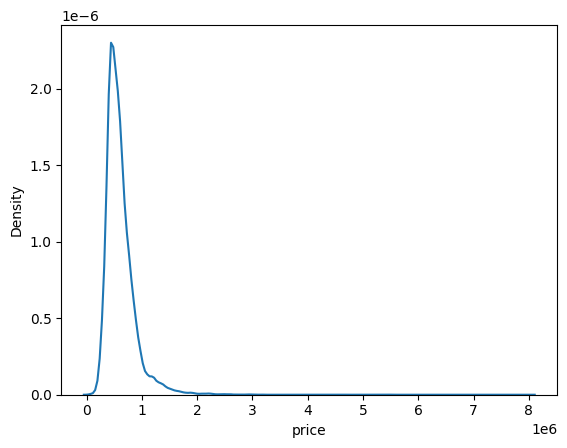

In [31]:
import seaborn as sns
sns.kdeplot(sales_df.price)

This graph does not look like the graph of a normal distribution.It infact shows that the data is skewed

In [34]:
sales_df['price_transformed']=np.log(sales_df.price)
sales_df.price_transformed.skew()

0.4731646269984763

This shows that the anomaly/skewdness has reduced as a result of the np.log

In [35]:
len(anomaly_det(sales_df.price_transformed))

266

We get 266 which is a reduced value from 461

<Axes: xlabel='price_transformed', ylabel='Density'>

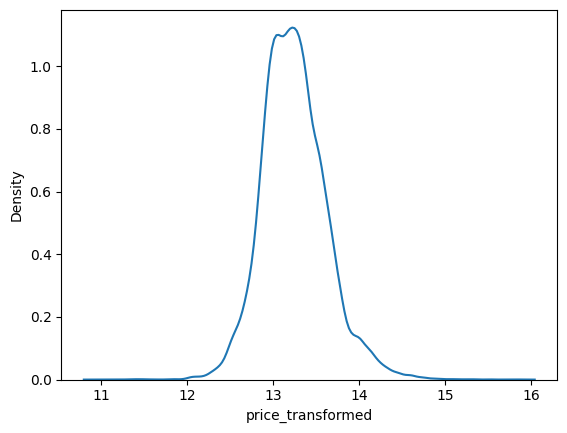

In [36]:
sns.kdeplot(sales_df.price_transformed)

Repeat the process again to reduce further

In [38]:
sales_df["double_pricelog"]=np.log(sales_df.price_transformed)
sales_df.double_pricelog.skew()


0.33092530655758573

In [39]:
len(anomaly_det(sales_df.double_pricelog))

251

<Axes: xlabel='double_pricelog', ylabel='Density'>

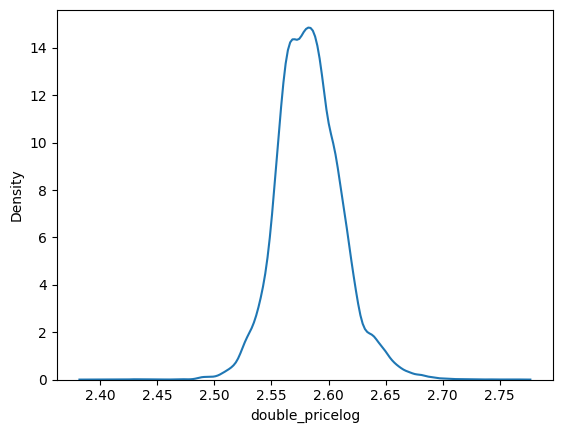

In [40]:
sns.kdeplot(sales_df.double_pricelog)

FEATURE BINNING

In [4]:
churn_df=pd.read_csv("/content/Churn_Modelling.csv")
churn_df.head(10)
churn_df.drop(columns=["CustomerId","Surname","RowNumber"], axis=1,inplace=True)
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Getting started with binning continuous values like age

In [6]:
churn_df.Age.min()

18

In [7]:
churn_df.Age.max()

92

In [14]:
labels=["0-20","21-40","41-60","Above 60"]

Now, we create bins.Bins are the last number of each label

In [13]:
bins=[0, 20, 40, 60,100]
churn_df["Age_bins"]=pd.cut(churn_df.Age, bins, labels=labels,include_lowest=True)
churn_df.Age_bins
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,21-40
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,21-40
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,21-40
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-60


FEATURE ENCODING

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
my_df=pd.read_csv("/content/Churn_Modelling.csv")
my_df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
my_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
le=LabelEncoder()
my_df["Gender_Label"]=le.fit_transform(my_df["Gender"])
my_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


One Hot Encoding

In [11]:
ohe=pd.get_dummies(my_df['Geography']).astype(int)
ohe
# my_df["Geography"].dtype

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


To peform ohe on the entire dataset

In [25]:
df_ohe=pd.get_dummies(my_df,dtype=int)
df_ohe.drop(columns=["Gender_Label"],axis=1,inplace=True)
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1
